In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
blog_data=pd.read_csv("blogtext.csv")

In [3]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data.date = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.sample(20)

(611652, 7)


,id,gender,age,topic,sign,date,text
527811,1627994,female,17,indUnk,Virgo,2004-08-08,Making something out of nothing ...
36005,3962874,female,16,Student,Sagittarius,2004-07-18,I love shopping. I woke up at...
124003,1679249,female,37,indUnk,Leo,2004-08-08,"Photo of the Day for August 8, 2004 -..."
585656,3491774,male,36,indUnk,Gemini,2004-07-11,Here's the FOX news stories on OutFOXed...
539199,15365,female,34,indUnk,Cancer,2002-06-22,urlLink Archie McPhee Sometimes I fe...
644046,3892602,female,16,Student,Pisces,2004-07-11,"urlLink 'Awww, it's a valentine. THAT ..."
385877,1949004,female,25,Marketing,Sagittarius,2004-08-09,So lovely in Neverland *sigh*
566827,3043495,male,24,indUnk,Virgo,2004-07-08,'...the United States needs to do...
534836,1748260,female,16,Student,Libra,2003-12-31,All the colors of the rainbow All t...
633849,3860268,female,41,Biotech,Libra,2004-07-07,I posted on Craig's list yesterday that...


In [4]:
####################################################################################################
#####                            Sampling for code develpoment 
#####                            Remove after validating code
####################################################################################################

blog_data=blog_data.sample(frac=.02)

print("******WARNING****** \n DATASET SAMPLED!!!!!!")
print(blog_data.shape)

******WARNING****** 
 DATASET SAMPLED!!!!!!
(12233, 7)


# Word Embeddings

In [5]:
tfidf_transformer = TfidfVectorizer(stop_words="english",max_features=1500 )
n_grams_tfidf = tfidf_transformer.fit_transform(blog_data["text"])
n_grams_tfidf.shape

(12233, 1500)

In [6]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_tfidf,markersize=.5, marker="o",aspect='auto')
# plt.title("TF-IDF matrix")

In [7]:
top_n=100
txt_info= n_grams_tfidf.toarray().sum(axis=0)
indices = np.argsort(txt_info)[::-1]
features =tfidf_transformer.get_feature_names()
top_features = np.array([[features[i],float(txt_info[i])] for i in indices[:top_n]])
pd.DataFrame({"word":top_features[:,0],"info":top_features[:,1]})[:20]

,word,info
0,urllink,843.0459638505909
1,nbsp,467.9695848012508
2,just,448.1836911089752
3,like,447.48072192599864
4,know,335.8461089563673
5,time,319.58634209042873
6,really,311.3359333932318
7,don,301.41433444057054
8,think,291.5961242796425
9,good,287.26849696111753


Text(0.5,1,'Term info sorted')

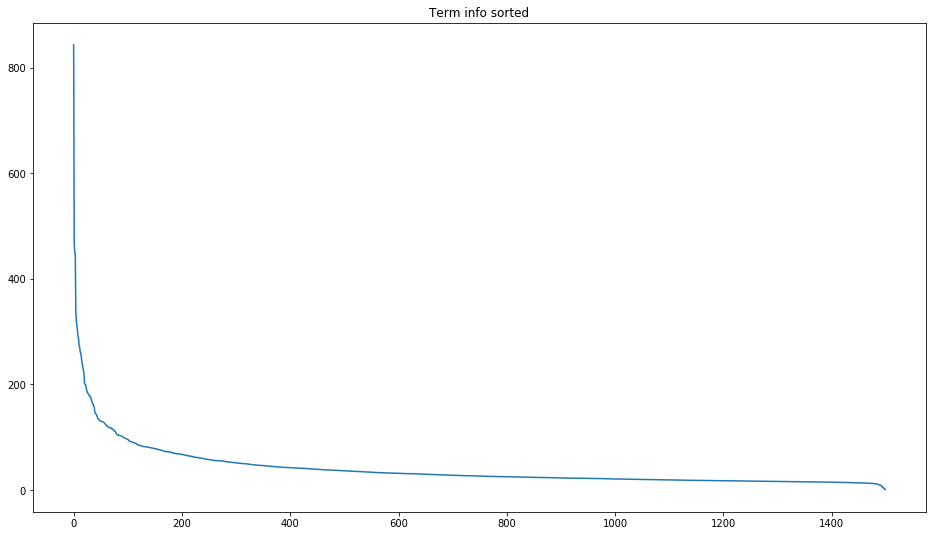

In [8]:
plt.figure(figsize=(16,9))
plt.plot(txt_info[indices])#[indices[:top_n]]
plt.title("Term info sorted")

In [9]:
# n_grams_count_top=n_grams_tfidf.toarray()[:,indices[:top_n]]

In [10]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_count_top,markersize=.5,aspect='auto', marker="o")
# plt.title("Top term info matrix")

In [11]:
# text_ward_full=hierarchy.linkage(n_grams_count_top, 'ward')#(n_grams_tfidf.toarray(),"ward")#
text_ward_full=hierarchy.linkage(n_grams_tfidf.toarray(),"ward")

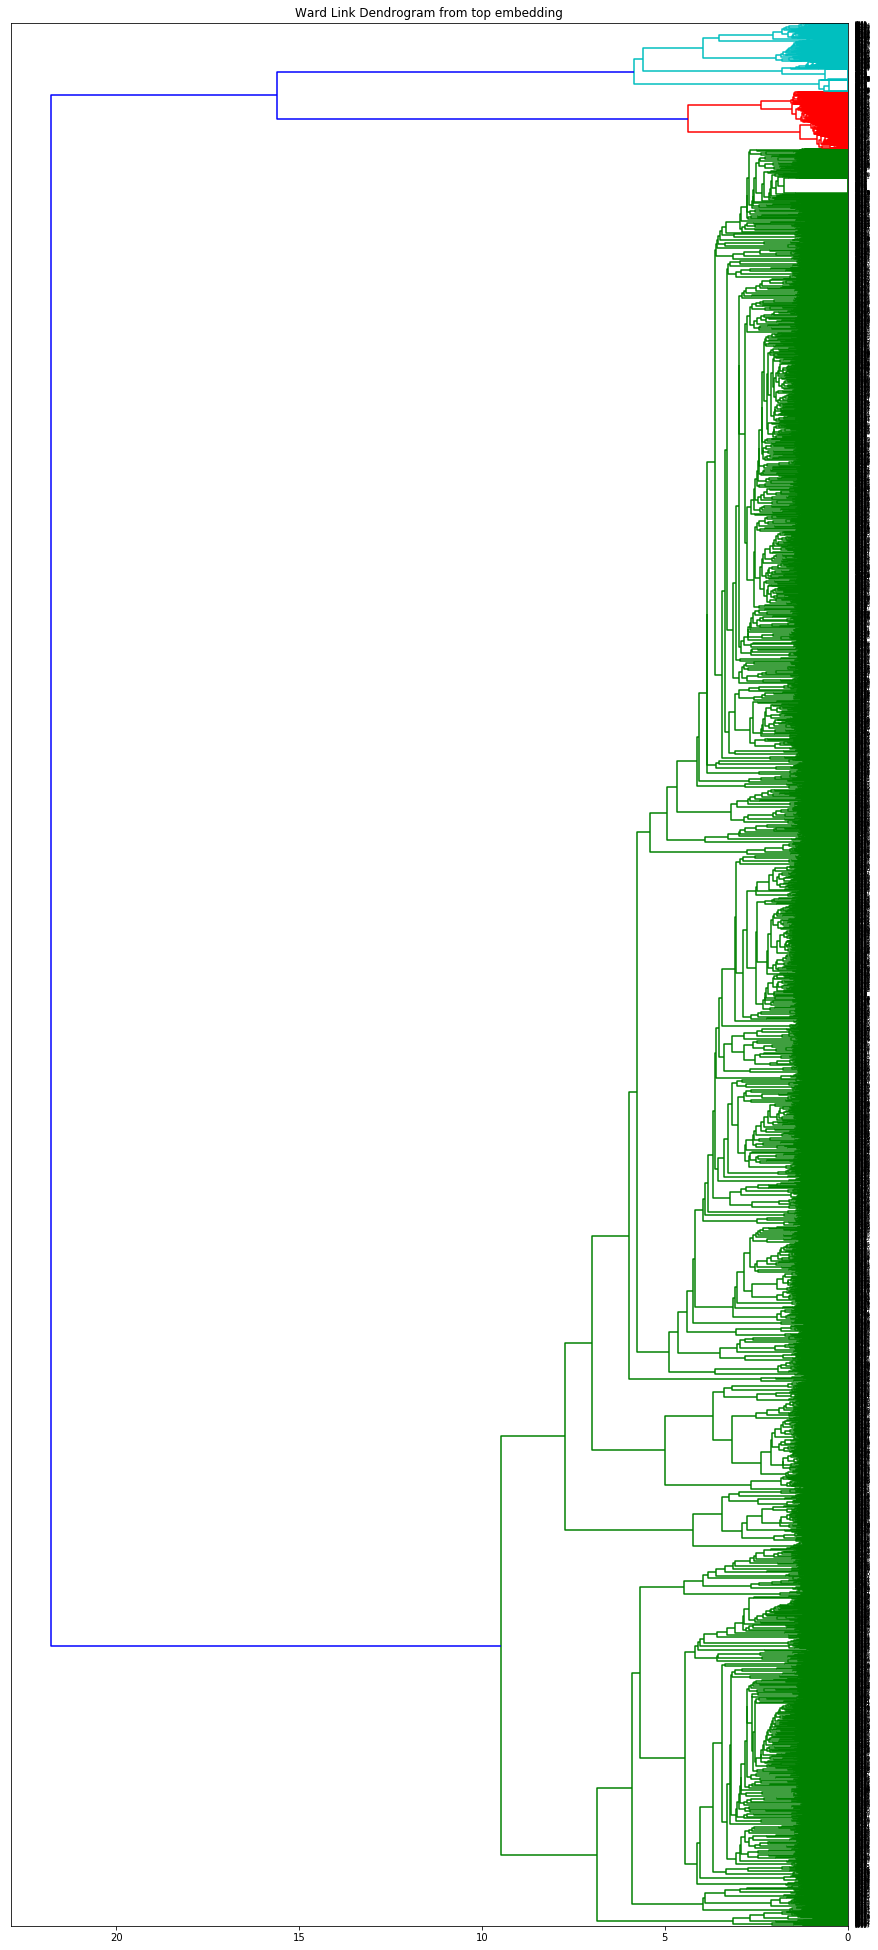

In [12]:
plt.figure(figsize=(15,35))
dn_tf_full = hierarchy.dendrogram(text_ward_full,orientation="left")
plt.title('Ward Link Dendrogram from top embedding')
plt.show()

